<a href="https://colab.research.google.com/github/darkdraiden14/Deep-Neural-Network-with-PyTorch/blob/master/Weight%20Initialization%20using%20He%20Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Test Uniform, Default and He Initialization on MNIST Dataset with Relu Activation</h1>

<h2>Table of Contents</h2>
<p>In this lab, you will test the Uniform Initialization, Default Initialization and He Initialization on the MNIST dataset with Relu Activation</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Cost">Define Several Neural Network, Criterion function, Optimizer</a></li>
    <li><a href="#Train">Test Uniform, Default and He Initialization</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>

<h2>Preparation</h2>

We'll need the following libraries:  

In [1]:
# Import the libraries we need to use in this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

<!--Empty Space for separating topics-->

<h2 id="Model">Neural Network Module and Training Function</h2> 

Define the neural network module or class with He Initialization

In [2]:
# Define the class for neural network model with He Initialization

class Net_He(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_He, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity='relu')
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

Define the class or neural network with Uniform Initialization

In [3]:
# Define the class for neural network model with Uniform Initialization

class Net_Uniform(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size,output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
                
        return x

Class or Neural Network with PyTorch Default Initialization

In [4]:
# Define the class for neural network model with PyTorch Default Initialization

class Net(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)
        
    def forward(self, x):
        L=len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
                
        return x

Define a function to train the model, in this case the function returns a Python dictionary to store the training loss and accuracy on the validation data 

In [5]:
# Define function to  train model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss': [], 'validation_accuracy': []}  
    
    #n_epochs
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)
    
    return loss_accuracy

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make some Data</h2> 

Load the training dataset by setting the parameters <code>train </code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>

In [6]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Load the testing dataset by setting the parameters train  <code>False</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>

In [7]:
# Create the validation dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the training-data loader and the validation-data loader object 

In [8]:
# Create the data loader for training and validation

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->

<h2 id="Cost">Define Neural Network, Criterion function, Optimizer and Train the Model</h2> 

Create the criterion function  

In [9]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Create a list that contains layer size 

In [10]:
# Create the parameters

input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 200, 100, output_dim]

<!--Empty Space for separating topics-->

<h2 id="Train">Test PyTorch Default Initialization, Xavier Initialization and Uniform Initialization</h2> 

Train the network using PyTorch Default Initialization

In [11]:
# Train the model with the default initialization

model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader,validation_loader, optimizer, epochs=30)

Train the network using He Initialization function

In [12]:
# Train the model with the He initialization

model_He = Net_He(layers)
optimizer = torch.optim.SGD(model_He.parameters(), lr=learning_rate)
training_results_He = train(model_He, criterion, train_loader, validation_loader, optimizer, epochs=30)

Train the network using Uniform Initialization function

In [13]:
# Train the model with the Uniform initialization

model_Uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=learning_rate)
training_results_Uniform = train(model_Uniform, criterion, train_loader, validation_loader, optimizer, epochs=30)

<!--Empty Space for separating topics-->

<h2 id="Result">Analyze Results</h2> 

Compare the training loss for each activation 

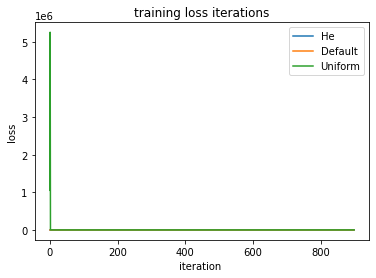

In [16]:
# Plot the loss

plt.plot(training_results_He['training_loss'], label='He')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ') 
plt.title('training loss iterations')
plt.legend()

Compare the validation loss for each model  

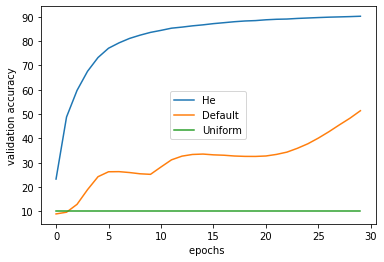

In [15]:
# Plot the accuracy

plt.plot(training_results_He['validation_accuracy'], label='He')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()